Credit Card Fraud Detection Code

Revision History
190619:  Initial release, EF


In [43]:
# Load necessary Libraries
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
import scipy
import math
import random
import itertools
from mpl_toolkits.axes_grid1 import make_axes_locatable
import string
from collections import Counter
from sklearn import metrics
from sklearn import ensemble
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.gridspec as gridspec
import seaborn as sns
from itertools import product
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, classification_report
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, recall_score
# from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [57]:
# Read file into code
data_df = pd.read_csv('data/creditcard.csv')

In [147]:
# Create separate dataframes for legitimate and fradualent transactions
data_fraud_df = data_df[data_df.Class == 1]
data_legit_df = data_df[data_df.Class == 0]

In [8]:
# Take a look a fraud transactions
pandas_profiling.ProfileReport(data_fraud_df)

Number of variables,32
Number of observations,492
Total Missing (%),0.0%
Total size in memory,123.1 KiB
Average record size in memory,256.2 B
Numeric,27
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [9]:
# Take a look at legitamate transactions
pandas_profiling.ProfileReport(data_legit_df)

Number of variables,32
Number of observations,284315
Total Missing (%),0.0%
Total size in memory,69.4 MiB
Average record size in memory,256.0 B
Numeric,30
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [10]:
# Look at all data points
pandas_profiling.ProfileReport(data_df)

Number of variables,31
Number of observations,284807
Total Missing (%),0.0%
Total size in memory,67.4 MiB
Average record size in memory,248.0 B
Numeric,30
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [14]:
# A function to apply new column to each row of our data frame for all variables added together

def total_of_row_vars(row):
    """ total each row's V values"""
    return row['V1'] + row['V2'] + row['V3'] + row['V4'] + row['V5'] + row['V6'] + row['V7'] + row['V8'] + row['V9'] + row['V10'] + row['V11'] + row['V12'] + row['V13'] + row['V14'] + row['V15'] + row['V16'] + row['V17'] + row['V18'] + row['V19'] + row['V20'] + row['V21'] + row['V22'] + row['V23'] + row['V24'] + row['V25'] + row['V26'] + row['V27'] + row['V28'] 

# A function to apply new column to each row of our data frame for all variable's mean

def mean_of_row_vars(row):
    """ find the mean of each row's V values"""
    return row['Total']/28

In [16]:
# Specifying axis=1 applies the function to each row; the default would apply the function to each column
# calls the function listed above.
data2_df=data_df
data2_df['Total'] = data_df.apply(total_of_row_vars, axis=1)



In [17]:
# Specifying axis=1 applies the function to each row; the default would apply the function to each column
# calls the function listed above.
data2_df['Row_Mean'] = data2_df.apply(mean_of_row_vars, axis=1)

In [18]:
# split fraud and legit transactions into separate dataframes for further analysis.
data2_fraud_df = data2_df[data_df.Class == 1]
data2_legit_df = data2_df[data_df.Class == 0]

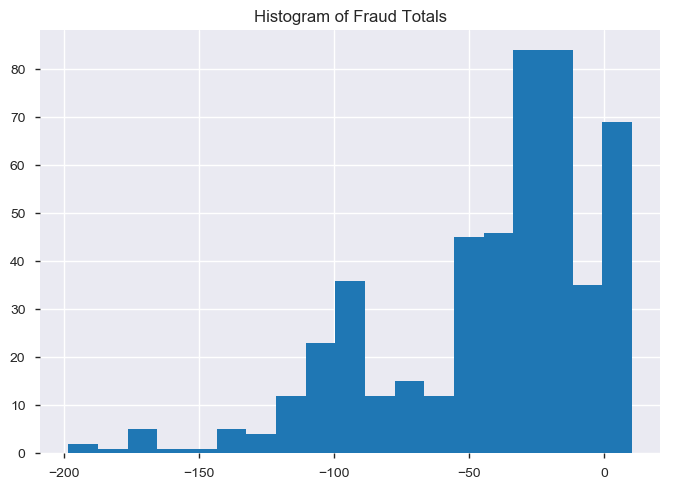

In [31]:
plt.hist(data2_fraud_df['Total'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of Fraud Totals")
plt.show()

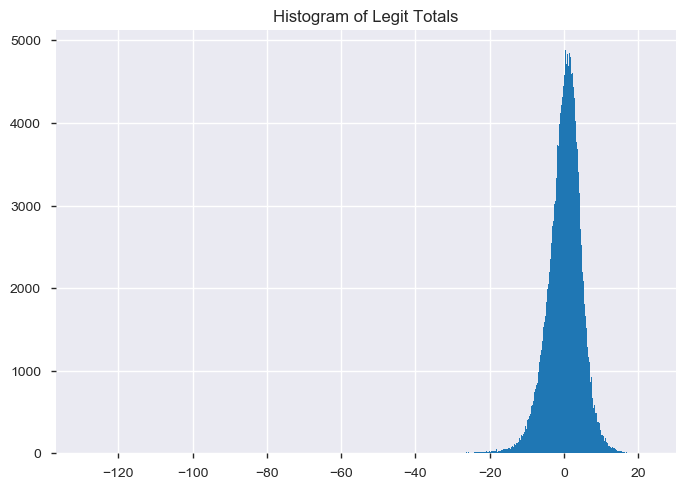

In [32]:
plt.hist(data2_legit_df['Total'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of Legit Totals")
plt.show()

In [92]:
X = data_df

In [93]:
y = X['Class']
X = X.drop(['Class'], axis = 1)

scaler = StandardScaler()
X= scaler.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

In [107]:
print(X_train.shape)

(227845, 9)


In [108]:
print(y_train.shape)

(227845,)


In [109]:
print(X_test.shape)

(56962, 9)


In [110]:
print(y_test.shape)

(56962,)


In [111]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
predictions = logisticRegr.predict(X_test)

In [139]:
score = logisticRegr.score(X_train, y_train)
print(score)

0.9988808181


In [118]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.998823777255


In [120]:
cm = metrics.confusion_matrix(y_test, predictions)
print (cm)

[[56854    10]
 [   57    41]]


This is an unacceptable result.  Less than 50% of fraudalent transactions are discovered.

In [138]:
predictions = logisticRegr.predict(X_train)
cm = metrics.confusion_matrix(y_train, predictions)
print (cm)

[[227417     34]
 [   221    173]]


In [153]:
data = data_df.sample(frac = 0.1, random_state = 1)
print(data.shape)

(28481, 31)


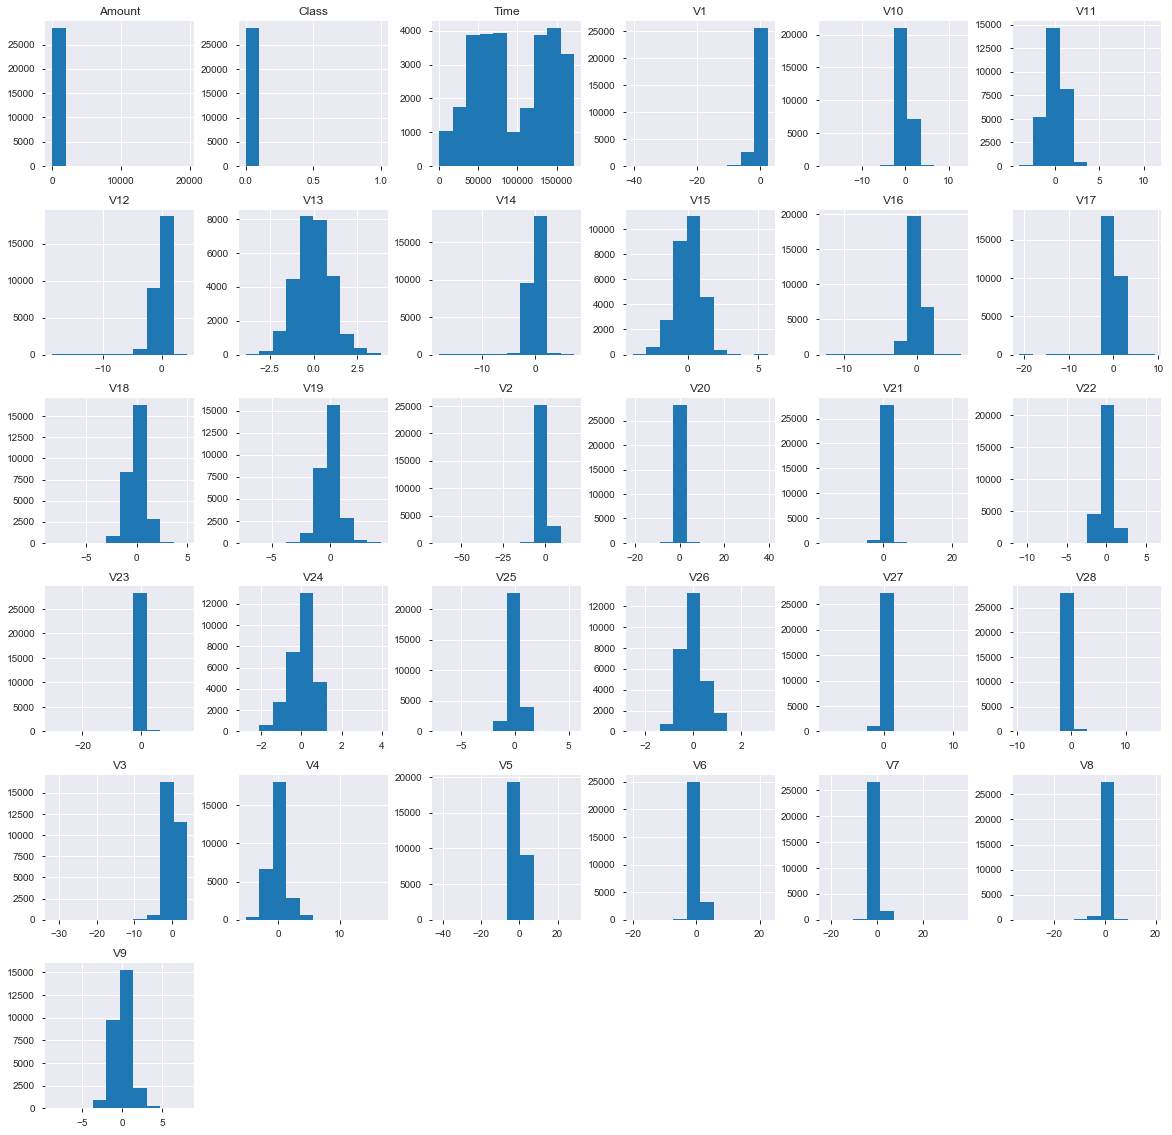

In [154]:
data.hist(figsize= (20,20))
plt.show()

In [155]:
Fraud = data[data.Class == 1]
Valid = data[data.Class == 0]

outlier_frac = len(Fraud) / float(len(Valid))
print(outlier_frac)
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432


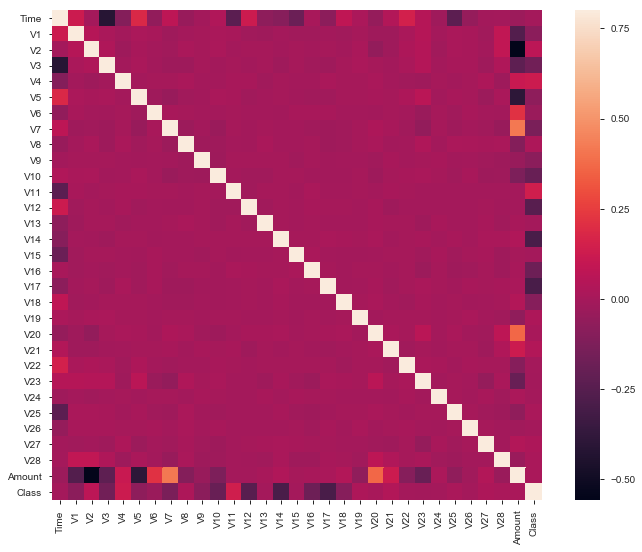

In [157]:
# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [161]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [169]:
state = 1
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination = outlier_frac,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_frac)
}


In [229]:
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    if clf_name != "Local Outlier Fraction":
        clf.fit(X)
#         scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred  != Y). sum()
    
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 71
0.997507110003
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481



AttributeError: 'LocalOutlierFactor' object has no attribute 'predict'

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=4)

In [202]:
model1=GaussianNB()
model1.fit(x_train,y_train)

GaussianNB(priors=None)

In [203]:
pred=model1.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [205]:
confusion_matrix=pd.crosstab(y_test,pred,rownames=['Actual'],colnames=['prediction'])
confusion_matrix

prediction,0,1
Actual,,
0,5644,44
1,2,7


In [206]:
report=classification_report(y_test,pred)
print(report)

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      5688
          1       0.14      0.78      0.23         9

avg / total       1.00      0.99      0.99      5697



In [208]:
score=model1.score(x_test,y_test)
score

0.99192557486396349

In [210]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [212]:
score=model.score(x_test,y_test)
score

0.99912234509390907

In [219]:
adt=AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
adt.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [2]:
# SMOTE method
ros = RandomOverSampler(random_state=0)
sm = SMOTE(k_neighbors=1, ratio='minority')

In [3]:
kind = [ros, sm]

In [7]:
data = data_df.sample(frac = 0.1, random_state = 1)
print(data.shape)

(28481, 31)


In [19]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"

X = data[columns]
y = data[target]

print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


In [20]:
X_sampled, x_test, y_sampled, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [21]:
def plot_decision_boundaries(clf, X_sampled):
    # Plotting decision regions
    x_min, x_max = X_sampled[:, 0].min() - 1, X_sampled[:, 0].max() + 1
    y_min, y_max = X_sampled[:, 1].min() - 1, X_sampled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

In [24]:
# Random Forest Method
# split dataframe to 2 dataframes, 1 with the data, 1 with the class-used to confirm model works
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"

x = data[columns]
y = data[target]

print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(19936, 30)
xtest shape
(8545, 30)


In [28]:
# Random Forest Method
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain, ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf)) 
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' %(metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
confusion matrix
[[8533    0]
 [   6    6]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8533
          1       1.00      0.50      0.67        12

avg / total       1.00      1.00      1.00      8545

Accuracy : 0.999298
Area under the curve : 0.750000


In [58]:
# SMOTE try 3
data = data_df.drop(['Time', 'Amount'], axis=1)


In [59]:
X = np.array(data.ix[:, data.columns != 'Class'])
y = np.array(data.ix[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 28)
Shape of y: (284807, 1)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 28)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 28)
Number transactions y_test dataset:  (85443, 1)


In [61]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (398038, 28)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [62]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1.0 ...........................................................
[CV] C=1.0 ...........................................................
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.9423173550396945, total=   4.6s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.9423550396945031, total=   4.7s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.9429454326198372, total=   4.2s
[CV] C=2.0 ...........................................................
[CV] .................. C=1.0, score=0.9434730177871571, total=   3.8s
[CV] C=2.0 ...........................................................
[CV] .................. C=1.0, score=0.9444891088611411, total=   3.9s
[CV] C=2.0 ...........................................................
[CV] ...........

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   19.2s


[CV] .................. C=3.0, score=0.9429454326198372, total=   4.2s
[CV] C=4.0 ...........................................................
[CV] .................. C=3.0, score=0.9434981408903628, total=   4.1s
[CV] C=4.0 ...........................................................
[CV] .................. C=3.0, score=0.9444765469939452, total=   4.2s
[CV] C=4.0 ...........................................................
[CV] .................. C=4.0, score=0.9423173550396945, total=   4.0s
[CV] C=4.0 ...........................................................
[CV] .................. C=4.0, score=0.9423550396945031, total=   4.0s
[CV] C=4.0 ...........................................................
[CV] .................. C=4.0, score=0.9429328710682343, total=   4.0s
[CV] C=5.0 ...........................................................
[CV] .................. C=4.0, score=0.9434981408903628, total=   3.9s
[CV] C=5.0 ...........................................................
[CV] .

[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [63]:
clf.best_params_

{'C': 3.0}

In [64]:
lr1 = LogisticRegression(C=4,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=5, warm_start=False)

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 91.30434782608695%


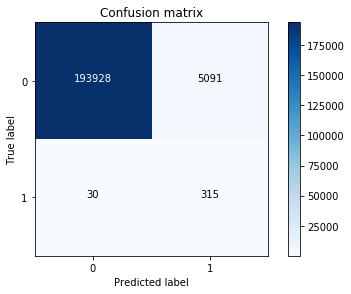

In [66]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 91.83673469387755%


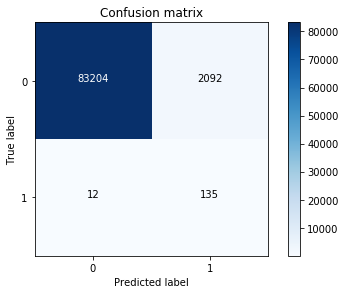

In [67]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [68]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[LibLinear]

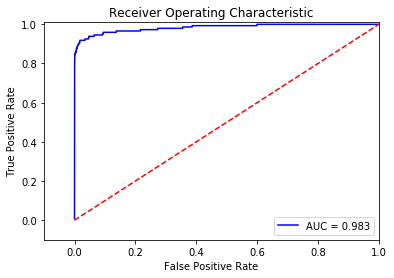

In [69]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
roc_auc

0.98324195087901978